Import Dependencies & Create Paths

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fake_data = os.path.join("Data", "Fake.csv")
true_data = os.path.join("Data", "True.csv")

In [3]:
fake_data = pd.read_csv(fake_data)
true_data = pd.read_csv(true_data)

In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake_data["score"] = 0
true_data["score"] = 1

In [7]:
data = pd.concat([fake_data, true_data])
data.head()

,title,text,subject,date,score
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
data.shape

(44898, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   score    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


Quick Data Analysis

In [10]:
palettes = ['#eee82c', '#91cb3e', '#53a548', '#4c934c', '#19381f']

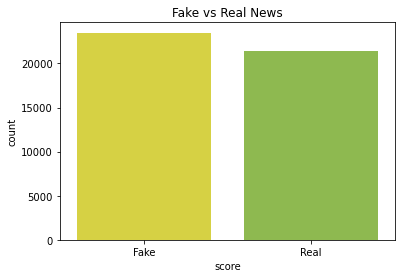

In [11]:
ax = sns.countplot(data=data, x="score", palette=palettes)
ax.set_title("Fake vs Real News")
plt.xticks([0, 1], ["Fake", "Real"])
plt.show()

In [12]:
data["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

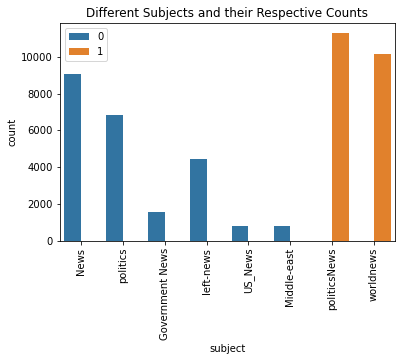

In [13]:
ax = sns.countplot(data=data, x="subject", hue ="score")
ax.set_title("Different Subjects and their Respective Counts")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
plt.show()

In [14]:
from wordcloud import WordCloud

def review(data, label=str):
    plt.figure(figsize=(10,10))
    wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,
                   background_color='#e6ffed', colormap='summer').generate(' '.join(data[label]))

    plt.axis('off')
    plt.imshow(wc)
    
    word = pd.DataFrame(wc.process_text(''.join(data[label])).items()).sort_values(1, ascending=False)
    
    print('Top 5 words that appear most frequently:\n')
    for i in range(5):
        item = word.iloc[i]
#        print(item)
        print(item[0] + '\t--> ' + str(item[1]))

Top 5 words that appear most frequently:

s	--> 139219
Trump	--> 79280
t	--> 45124
said	--> 33763
New	--> 28198


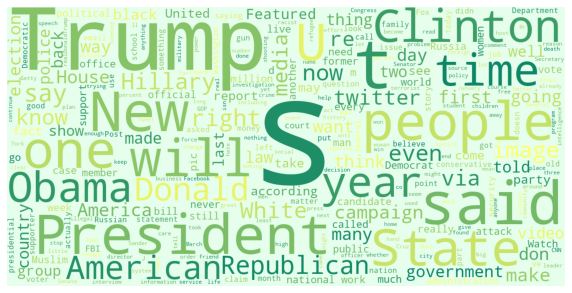

In [15]:
review(data=fake_data, label="text")

Top 5 words that appear most frequently:

s	--> 141136
said	--> 99062
Trump	--> 54731
U	--> 47110
State	--> 37676


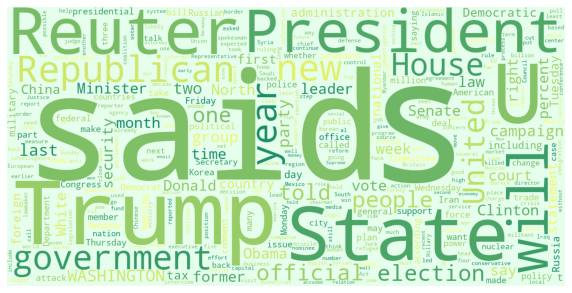

In [16]:
review(data=true_data, label="text")

In [17]:
data["length"] = data['text'].str.len()
data.head()

,title,text,subject,date,score,length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2346


In [18]:
def character_histplots():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,10))
    fake_lengths = data[data["score"] == 0]["length"]
    ax1.hist(fake_lengths,color='red')
    ax1.set_title("Lengths of Fake Texts")
    true_lengths = data[data["score"] == 1]["length"]
    ax2.hist(true_lengths,color='blue')
    ax2.set_title("Lengths of True Texts")
    fig.suptitle('Characters in Texts')
    plt.show()

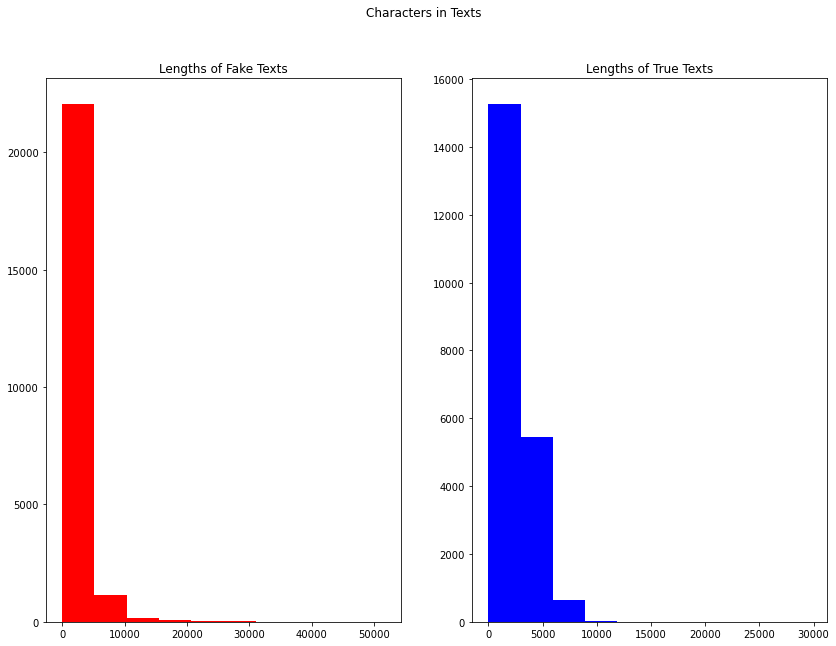

In [19]:
character_histplots()

In [20]:
def word_histplots():   
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    word = data[data['score'] == 0]['text'].str.split().apply(lambda x : [len(i) for i in x])
    sns.histplot(word.map(lambda x: np.mean(x)), ax = ax1, color = 'red')
    ax1.set_xlim(0,7)
    ax1.set(xlabel="Word Lengths")
    ax1.set_title('Fake Texts')
    word=data[data['score'] == 1]['text'].str.split().apply(lambda x : [len(i) for i in x])
    sns.histplot(word.map(lambda x: np.mean(x)), ax = ax2, color = 'green')
    ax2.set_title('True texts')
    ax2.set(xlabel="Word Lengths")
    fig.suptitle('Average Word Length in Each Text')

/Users/liranpod/miniconda3/envs/experimental/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/liranpod/miniconda3/envs/experimental/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/liranpod/miniconda3/envs/experimental/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/liranpod/miniconda3/envs/experimental/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


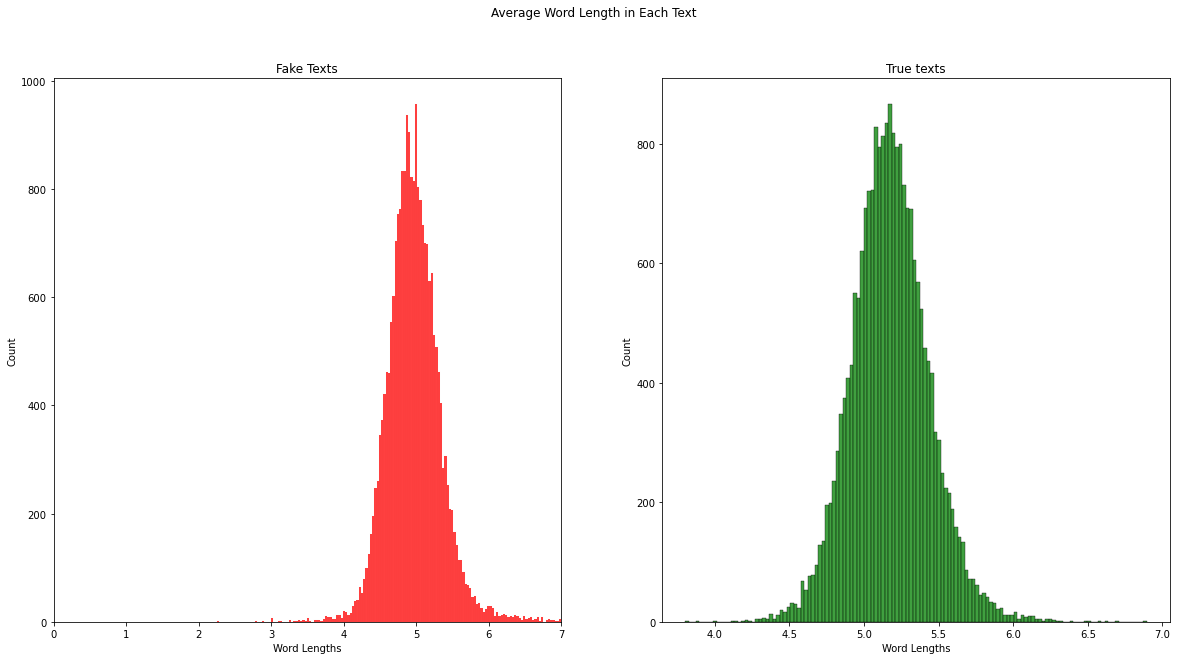

In [21]:
word_histplots()

In [22]:
data_final = data[["text", "score", "length"]]

Text Processing

In [23]:
length = data_final["length"].sum()
length

110858087

In [24]:
import nltk
nltk.download('wordnet') 
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liranpod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liranpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
print("Original:")
print(true_data["text"][2])

Original:
WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed over the White House since Trump took office in Ja

In [26]:
sentence = []
for word in true_data["text"][2].split():
    stemmer = SnowballStemmer("english")
    sentence.append(stemmer.stem(word))
print("Stemming:")
print(" ".join(sentence))

Stemming:
washington (reuters) - the special counsel investig of link between russia and presid trump 2016 elect campaign should continu without interfer in 2018, despit call from some trump administr alli and republican lawmak to shut it down, a promin republican senat said on sunday. lindsey graham, who serv on the senat arm forc and judiciari committees, said depart of justic special counsel robert mueller need to carri on with his russia investig without polit interference. “this investig will go forward. it will be an investig conduct without polit influence,” graham said on cbs face the nation news program. “and we all need to let mr. mueller do his job. i think he the right guy at the right time.” the question of how russia may have interf in the election, and how trump campaign may have had link with or co-ordin ani such effort, has loom over the white hous sinc trump took offic in january. it show no sign of reced as trump prepar for his second year in power, despit intensifi 

In [27]:
sentence = []
for word in true_data["text"][2].split():
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word, "v"))
print("Lemmatizing:")
print(" ".join(sentence))

Lemmatizing:
WASHINGTON (Reuters) - The special counsel investigation of link between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite call from some Trump administration ally and Republican lawmakers to shut it down, a prominent Republican senator say on Sunday. Lindsey Graham, who serve on the Senate arm force and judiciary committees, say Department of Justice Special Counsel Robert Mueller need to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conduct without political influence,” Graham say on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.” The question of how Russia may have interfere in the election, and how Trump’s campaign may have have link with or coordinate any such effort, have loom over the White House since Trump take office in January. It show n

In [28]:
# We will lemmatize.

In [29]:
def cleaning(text):
    # Remove punctuation and uppercase
    clean_text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    
    # Remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words("english")]
    
    # Lemmatize words
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, "v"))
        
    return ' '.join(sentence)

In [31]:
data["text"] = data["text"].apply(cleaning)

In [32]:
data['length'] = data['text'].apply(len)
new_length = data['length'].sum()

print('Total words before cleaning: {}'.format(length))
print('Total words after cleaning: {}'.format(new_length))

Total words before cleaning: 110858087
Total words after cleaning: 75734100


In [33]:
data.head()

,title,text,subject,date,score,length
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",0,1955
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0,1328
2,Sheriff David Clarke Becomes An Internet Joke...,friday reveal former milwaukee sheriff david c...,News,"December 30, 2017",0,2457
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announce would back...,News,"December 29, 2017",0,1913
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis use annual christmas day message ...,News,"December 25, 2017",0,1410


Creating Model 

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer

2023-02-22 15:58:05.327571: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    data["text"], data["score"], test_size=0.2)

In [36]:
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")

tokenizer.fit_on_texts(X_train)
total_word = len(tokenizer.word_index)
print('Total distinct words: {}'.format(total_word))

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq)

lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

Total distinct words: 208055


In [122]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, Dropout, Dense, LSTM, BatchNormalization

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

In [163]:
strategy = tf.distribute.get_strategy()
epochs = 15
batch_size = 64

In [170]:
def build_model():
    model = Sequential([
        Embedding(total_word+1, 64),
        Bidirectional(LSTM(64, activation="tanh")),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(32, activation="relu"),
        Dropout(0.5),
        Dense(16, activation="relu"),
        Dense(1, activation="softmax")
    ])
    return model

In [171]:
with strategy.scope():
    news_model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    news_model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [172]:
news_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, None, 64)          13315584  
                                                                 
 bidirectional_24 (Bidirecti  (None, 128)              66048     
 onal)                                                           
                                                                 
 dense_76 (Dense)            (None, 64)                8256      
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                                 
 dense_77 (Dense)            (None, 32)                2080      
                                                                 
 dropout_45 (Dropout)        (None, 32)                0         
                                                     

In [173]:
logdir = "Logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [174]:
checkpoint_cb = ModelCheckpoint("news_model.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

In [175]:
hist = news_model.fit(train_padded, train_labels, epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(test_padded, test_labels), 
                      callbacks=[tensorboard_callback, checkpoint_cb, early_stopping_cb])

Epoch 1/15
562/562 [==============================] - 2577s 5s/step - loss: 0.4405 - accuracy: 0.4764 - precision: 0.4764 - recall: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.4794 - val_precision: 0.4794 - val_recall: 1.0000
Epoch 2/15
562/562 [==============================] - 2340s 4s/step - loss: 0.0747 - accuracy: 0.4764 - precision: 0.4764 - recall: 1.0000 - val_loss: 0.0554 - val_accuracy: 0.4794 - val_precision: 0.4794 - val_recall: 1.0000
Epoch 3/15
562/562 [==============================] - 2276s 4s/step - loss: 0.0426 - accuracy: 0.4764 - precision: 0.4764 - recall: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.4794 - val_precision: 0.4794 - val_recall: 1.0000
Epoch 4/15
562/562 [==============================] - 2247s 4s/step - loss: 0.0490 - accuracy: 0.4764 - precision: 0.4764 - recall: 1.0000 - val_loss: 0.0361 - val_accuracy: 0.4794 - val_precision: 0.4794 - val_recall: 1.0000
Epoch 5/15
562/562 [==============================] - 2260s 4s/step - loss: 0.0145 - accuracy: 0

In [180]:
def plot(metric=str):
    plt.figure(figsize=(8,6))
    
    plt.plot(hist.history[metric], color="teal", label=metric)
    plt.plot(hist.history["val_" + metric], color="orange", label="val " + metric)
    plt.title(metric)
    plt.legend(loc="upper left")
    
    plt.show()

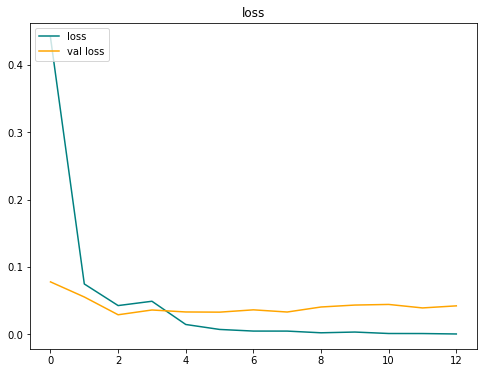

In [181]:
plot("loss")

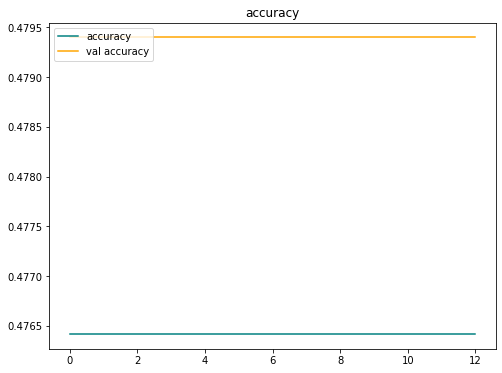

In [182]:
plot("accuracy")

In [184]:
def model_prediction(text):
    clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq)
    
    pred = news_model.predict(padded)
    result = lb.inverse_transform(pred)[0]
    
    return result

In [185]:
text1 = "Joe Mama"

print('Model\t: ', model_prediction(text1))

1/1 [==============================] - 1s 598ms/step
Model	:  1


In [186]:
# This model was very innacurate.